In [4]:
nc = Dataset('../../data/WRF/2d/d02_2014-09-10_transf.nc')

In [32]:
T = nc.variables['temp'][:]
G = nc.variables['ghgt'][:]

In [33]:
Tm = np.mean(T,0)
Gm = np.mean(G,0)

In [34]:
Ts = np.std(T,0)
Gs = np.std(G,0)

In [40]:
g = Gm.flatten()
bm = binned_statistic(g, Tm.flatten(), 'std', 50)
bs = binned_statistic(g, Ts.flatten(), 'mean', 50)

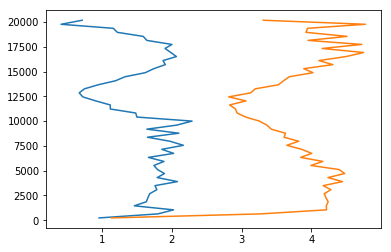

In [41]:
plt.plot(bm[0], bm[1][:-1]+np.diff(bs[1])/2)
plt.plot(bs[0], bm[1][:-1]+np.diff(bs[1])/2)

In [28]:
h = np.histogram(G.flatten(),50)

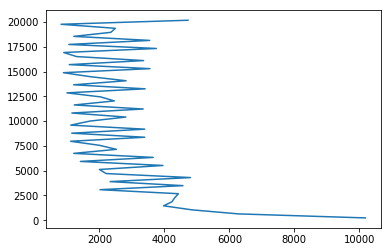

In [29]:
plt.plot(h[0], h[1][:-1]+np.diff(bs[1])/2)

# Extraterrestrial radiation

## Hour angle
https://en.wikipedia.org/wiki/Hour_angle

$$
LHA_{sun} = LST - \alpha_{sun}
$$

$LHA$ local hour angle, $LST$ local sidereal time, $\alpha$ right ascension.

```
import ephem
sun = ephem.Sun()
obs = ephem.Observer()

# apparent topocentric right ascenscion
# meaning: all corrections (relativistic, light travel time, parallax, location on earth etc)
# are applied before computing the position of the sun
sun.ra

# apparent topocentric declinaction
sun.dec

# local sidereal time
obs.sidereal_time()
```

## Zenith

https://en.wikipedia.org/wiki/Solar_zenith_angle

Solar zenith angle is given by:

$$
\mu \equiv \cos \theta = \sin \alpha = \sin \Phi \sin \delta + \cos \Phi \cos \delta \cos h
$$

where $\theta$ solar zenith angle, $\alpha$ solar elevation angle, $\Phi$ latitude, $\delta$ solar declination, $h$ hour angle. Hence Eq. 28 of <cite data-cite="2031184/23R794ET"></cite> is equivalent to $F_{\downarrow TOA} = S_0 \mu_0$.

# <cite data-cite="2031184/8MGQW9FQ"></cite>

energy balance:

$$
\begin{align}
\theta_* &= \frac{\lambda E - Q^* + G}{\rho C_p u_*} \\
\lambda E &= \frac{\alpha S}{S+1} \left(Q^* - G \right) + \alpha \beta \rho \lambda \Delta q_d u_*
\end{align}
$$

where $\lambda$ latent heat of evaporation ($\lambda E$ latent heat flux)

net radiation $Q^*$ (subscript $i$ isothermal):

$$
\begin{align}
Q^* & = K^* + L^+ - L^- \\
Q_i^* & = K^*+L_i^* \\
L^+ - L^- & = L_i^* + 4 \sigma T_r^3 \left(T_r - T_0 \right)
\end{align}
$$

gives

$$
\quad Q^* = Q_i^* + 4 \sigma T_r^3 \left(T_r -T_0 \right)
$$

where the last term is the correction due to temperature gradients (non-isothermal conditions). All subscripts $r$ with respect to a reference height (ca. 50 m), $T_0$ is the  radiation temperature of the surface.

For $\theta_*$:

$$
\theta_* = \frac{\left(\alpha -1 \right) S -1}{\left(S+1 \right) \rho C_p u_*} \left(Q^* -G \right) + \alpha \theta_d
$$

with $\alpha$ an empirical constant (wet grass $\alpha = 1$, prairie grass $\alpha = 0.5$, desert $\alpha = 0$),

$ \theta_d = \beta \lambda \frac{\Delta q_d}{C_p} \quad$ a temperature scale: $\beta \lambda \Delta q_d u_* \approx 20$ W m⁻² <cite data-cite="2031184/2EBHW8VH"></cite>.

and $ \quad S = e^{0.055 \left(T_r-279 \right)} \quad$ ($279 < T_r < 310$ K) the slope of the saturation enthalpy curve.

**Note:** Net longwave radiation is obtained from:

$$
\begin{align}
L^* &= c_1 \sigma T_r^6 + c_2 N \\
L^- &= \sigma T_0^4
\end{align}
$$

and expanding $L^-$ into a truncated Taylor series about $T_r$:

$$
L^- = \sigma T_r^4 - 4 \sigma T_r^3 \left(T_r - T_0 \right)
$$

The isothermal longwave radiation $L_i^*$ is modelled by:

$$
L_i^* = - \sigma T_r^4 \left(1- c_1 T_r^2 \right) + c_2 N
$$

where $N$ total cloud cover, $c_1=9.35 \times 10^{-6}$ K⁻² and $c_2=60$ W m².

**during the day**, deviation from isothermal conditions and ground heat flux $G$ can be modelled:

$$
\begin{align}
4 \sigma T_r^3 \left(T_r - T_0 \right) & = - C_H Q^* \\
G &= C_G Q^*
\end{align}
$$

Hence
$$
\begin{align}
\therefore \quad Q^* & = \frac{Q_i^*}{1+C_H} \\
\therefore \quad \theta_* &= - \frac{\left(1- \alpha \right) S + 1}{\left(S+1 \right) \rho C_p u_*} \frac{1-C_G}{1+C_H} Q_i^* + \alpha \theta_d
\end{align}
$$

The flux coefficients:

$$
\begin{align}
C_H &= 0.38 \frac{\left(1- \alpha \right) S + 1}{S+1} \\
C_G &= \frac{A_G}{4 \sigma T_r^3} C_H
\end{align}
$$

with empirical constand $A_G$ ($\approx 5 W m^{-2} K^{-1}$ for grass surface).

**during nighttime**, the temperature difference can be modelled using similarity theory (since mostly affected by wind speed):

$$
T_r - T_0 = \frac{\theta_*}{k} \left[ ln \left(\frac{z_r}{z_H} \right) + 5 \frac{z_r}{L} \right] - \Gamma_d z_r
$$

and the ground heat flux also depends on this difference:
$$
G = -A_G \left( T_r - T_0 \right)
$$

where $\quad L = \frac{u_*^2 T_r}{kg \theta_*} \quad $ the Monin-Obukhov length. $\frac{1}{k} ln \frac{z_r}{z_H} \approx 30$ for short grass <cite data-cite="2031184/2UVU9VJD"></cite>, where $z_r$ reference height ($\approx 50$ m), $z_H$ roughness length for heat transfer. 

roughness lengths for temperature and momentum <cite data-cite="2031184/TI4ZF8MN"></cite>:

$$
z_{0T} = z_{0M} e^{-k C Re^{1/2}}
$$

where $C$ empirical constant and $Re = \frac{z_{0M}}{\nu} u_*$ Reynolds number, with $\nu$ molecular viscosity.

cloud cover <cite data-cite="2031184/SS8QRG3X"></cite>:

$$c = 1 - R_S/R_{SO}$$

where $R_S$ is measured solar radiation and $R_{SO}$ clear sky solar radiation.

# Shortwave

## clear sky

<cite data-cite="2031184/U5M9ZDPU"></cite>

$$
R_{SO} = R_a \exp \left(\frac{-0.0018 p}{K_t \mu} \right)
$$

where $0 < K_t < 1$ a turbidity coefficent (1 for clean air), $p$ [kPa] air pressure. Air pressure can be calculated from altitude $z$:

$$
p(z) = 101.3 \left(1- \frac{0.0065 z}{293} \right)^{5.26}
$$

<cite data-cite="2031184/IDF36CZ7"></cite>

$$
R_{SO} = R_a T_R T_{pg} T_w T_a
$$

where the subscripts to transmission coefficients $T$ denote: $R$ Rayleigh scattering, $pg$ permanent gases, $w$ water vapor, $a$ aerosols. 

$$
\begin{align}
T_R T_{pg} &= 1.021 - 0.084 \sqrt{m \left(949p \times 10^{-5} + 0.051 \right)} \\
m &= \frac{35}{\sqrt{1224 \mu^2 + 1}} \\
T_w &= 1 - 0.077 \left(um \right)^{0.3} \\
u &= \exp \left(0.1133 - \ln \left( \lambda +1 \right) + 0.0393 T_d \right) \\
T_a &= x^m
\end{align}
$$

with $p$ in [kPa], $u$ column precipitable water and dewpoint temperature $T_d$ in [$^{\circ}$F]<cite data-cite="2031184/GKCTEJEJ"></cite>, $\lambda$ an empirical constant. Note <cite data-cite="2031184/RFDSZXPP"></cite> have error in equation for optical air mass $m$. 

In <cite data-cite="2031184/RFDSZXPP">,

$$
T_a = 0.935^m
$$